<a href="https://colab.research.google.com/github/IA2122/practica-8-paochoa/blob/main/practica8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 8. Ejercicio adicional 1: Sudoku. Parte II.

Este notebook es el menos guiado de la asignatura. El objetivo es combinar todo lo que hemos visto a lo largo del curso para leer un Sudoku y resolverlo. Para ello tendrás que utilizar lo visto en la práctica anterior, y además [un algoritmo para resolver Sudokus](http://norvig.com/sudoku.html). A la hora de leer los dígitos del Sudoku puedes utilizar cualquiera de estas aproximaciones:
- Utilizar propiedades de contornos como vimos en la práctica anterior. 
- [Utilizar la librería pytesseract](https://www.pyimagesearch.com/2020/09/21/opencv-automatic-license-number-plate-recognition-anpr-with-python/). 
- [Entrenar un modelo basado en el dataset MNIST](https://www.pyimagesearch.com/2020/08/10/opencv-sudoku-solver-and-ocr/).

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils

In [2]:
!wget https://github.com/IA1819/Datasets/blob/master/im%C3%A1genes.zip?raw=true -O imagenes.zip
!unzip imagenes.zip

--2022-05-16 16:55:39--  https://github.com/IA1819/Datasets/blob/master/im%C3%A1genes.zip?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IA1819/Datasets/raw/master/im%C3%A1genes.zip [following]
--2022-05-16 16:55:39--  https://github.com/IA1819/Datasets/raw/master/im%C3%A1genes.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IA1819/Datasets/master/im%C3%A1genes.zip [following]
--2022-05-16 16:55:39--  https://raw.githubusercontent.com/IA1819/Datasets/master/im%C3%A1genes.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting respo

In [3]:
def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        img2 = image
        plt.imshow(img2,cmap='gray')
        plt.show()

In [4]:
def blankImage(image):
  if image.min() == 255:
    return 0
  else:
    return '.'

In [5]:
def leerNumeros(image):
  clon = image.copy()
  gris = cv2.cvtColor(clon, cv2.COLOR_BGR2GRAY)
  umbral = cv2.threshold(gris, 30, 255, cv2.THRESH_BINARY_INV)[1]
  contornos, _ = cv2.findContours(umbral.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

  for (i, c) in enumerate(contornos):
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)
    aspectRatio = w / float(h)
    extent = area / float(w * h)
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)

    if(solidity < 1.00):
      if (solidity > 0.35 and solidity < 0.36 and area == 39.50):
        return 2
      elif (solidity > 0.30 and solidity < 0.31 and area == 33.00):
        return 3
      elif (solidity > 0.69 and solidity < 0.70 and area == 61.00):
        return 4
      elif (solidity > 0.33 and solidity < 0.34 and area == 36.5):
        return 5
      elif(solidity > 0.69 and solidity < 0.7 and area == 72.00):
        return 6
      elif (solidity > 0.29 and solidity < 0.30 and area == 25.00):
        return 7
      elif (solidity > 0.87 and solidity < 0.88 and area == 98.5):
        return 8
      elif (solidity > 0.68 and solidity < 0.69 and area == 72.5 ):
        return 9
      elif (solidity < 0.93):
        return 1

In [6]:
def sort_contours(cnts):
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),key=lambda b:(b[1][1],b[1][0]), reverse=False))
    return cnts

In [7]:
# se le pasa la ruta del sudoku y un modelo entrenado para la reconocer dígitos
def leerSudoku(sudoku):
  cuadricula = []

  clon = sudoku.copy()
  gris = cv2.cvtColor(clon, cv2.COLOR_BGR2GRAY)
  umbral = cv2.threshold(gris, 30, 255, cv2.THRESH_BINARY_INV)[1]
  contornos, _ = cv2.findContours(umbral.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  cnts_sorted = sort_contours(contornos)
  for (i, c) in enumerate(cnts_sorted):
    area = cv2.contourArea(c)
    # Calculamos el rectángulo contenedor
    (x, y, w, h) = cv2.boundingRect(c)
    # Calculamos el convex hull
    hull = cv2.convexHull(c)
    # Calculamos el área del convex hull
    hullArea = cv2.contourArea(hull)
    # Calculamos la solidity
    solidity = area / float(hullArea)
    # Inicializamos el texto a mostrar
    char = ""
    # Si la solidity es alta, entonces está vacio
    if solidity == 1.0 and area > 1000 and area < 2000:
      aux = sudoku[y+5:y+h-5,x+5:x+w-5]
      char = blankImage(aux) # en caso de que no tenga número devolverá 0, si tiene número devolverá "."
    if char == ".":
      cuadricula.append(leerNumeros(aux)) # se predice que número tiene la imagen pasada a partir del modelo
    if char == 0:
      cuadricula.append(char)
  return cuadricula

In [8]:
# Lo que hace es coger cada cajita 3*3 y la pone en filas
def get_cajitas(cuadricula):
  cajitas = []
  for caja_i in range(3):
    for caja_j in range(3):
      cajita = []
      for i in range(3):
        for j in range(3):
          cajita.append(cuadricula[3*caja_i + i][3*caja_j + j])
      cajitas.append(cajita)
  return np.array(cajitas)

In [9]:
# Saca todos los posibles candidatos para las casillas donde hay 0s
def get_candidatos(cuadricula):

  def indice_cajitas(i, j):
    return (i//3) * 3 + j//3
  cajitas = get_cajitas(cuadricula)
  candidatos = []
  for i in range(9):
    candidatos_fila = []
    for j in range(9):
      fila = set(cuadricula[i])
      col = set(cuadricula[:, j])
      sub = set(cajitas[indice_cajitas(i,j)])
      comun = fila | col | sub
      candidatosS = set(range(10)) - comun
      if not cuadricula[i][j]:
        candidatos_fila.append(list(candidatosS))
      else:
        candidatos_fila.append([cuadricula[i][j]])
    candidatos.append(candidatos_fila)
  return candidatos

In [10]:
# Rellena la cuadricula donde solo hay 1 candidato
def rellena_unicos(cuadricula):
  candidatos = get_candidatos(cuadricula)
  rellenar = True
  while rellenar:
    rellenar = False
    for i in range(9):
      for j in range(9):
        if len(candidatos[i][j]) == 1 and cuadricula[i][j] == 0:
          cuadricula[i][j] = candidatos[i][j][0]
          rellenar = True
  return cuadricula

In [11]:
# Comprueba si el sudoku está resuelto
def is_solved(cuadricula):
  if np.all(np.sum(cuadricula, axis=1) == 45) and \
    np.all(np.sum(cuadricula, axis=0) == 45) and \
    np.all(np.sum(get_cajitas(cuadricula), axis=1) == 45):
    return True
  return False

In [12]:
def is_valid(cuadricula):
  candidates = get_candidatos(cuadricula)
  for i in range(9):
    for j in range(9):
      if len(candidates[i][j]) == 0:
        return False
  return True

In [13]:
def make_guess(cuadricula):
  candidatos = get_candidatos(cuadricula)
  # Getting the shortest number of candidates > 1:
  min_len = sorted(list(set(map(len, np.array(candidatos).reshape(1,81)[0]))))[1]
  for i in range(9):
    for j in range(9):
      if len(candidatos[i][j]) == min_len:
        for guess in candidatos[i][j]:
          cuadricula[i][j] = guess
          solution = resuelveSudoku(cuadricula)
          if solution is not None:
            return solution
          # Discarding incorrect guess
          cuadricula[i][j] = 0

In [14]:
def resuelveSudoku(cuadricula):
  cuadricula = rellena_unicos(cuadricula)
  if is_solved(cuadricula):
    return cuadricula
  if not is_valid(cuadricula):
    return cuadricula
  return make_guess(cuadricula)

In [72]:
def dibujaSudoku(sudoku, cuadricula):
  clon = sudoku.copy()
  gris = cv2.cvtColor(clon, cv2.COLOR_BGR2GRAY)
  umbral = cv2.threshold(gris, 30, 255, cv2.THRESH_BINARY_INV)[1]
  contornos, _ = cv2.findContours(umbral.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  cnts_sorted = sort_contours(contornos)
  it = 0
  j = 0
  for (i, c) in enumerate(cnts_sorted):
    area = cv2.contourArea(c)
    # Calculamos el rectángulo contenedor
    (x, y, w, h) = cv2.boundingRect(c)
    # Calculamos el convex hull
    hull = cv2.convexHull(c)
    # Calculamos el área del convex hull
    hullArea = cv2.contourArea(hull)
    # Calculamos la solidity
    solidity = area / float(hullArea)
    # Inicializamos el texto a mostrar
    char = ""
    # Si la solidity es alta, entonces es un '0'
    if solidity == 1.0 and area > 1000 and area < 2000:
      aux = sudoku[y+5:y+h-5,x+5:x+w-5]
      char = blankImage(aux) # en caso de que no tenga número devolverá "0", si tiene número devolverá "."
      # print("it")
      # print(it)
      # print("j")
      # print(j)
      # print("cuadricula")
      # print(cuadricula[it][j])
      if char == 0:
        cv2.putText(clon, str(cuadricula[it][j]), (x + 10, y + 27), cv2.FONT_HERSHEY_PLAIN, 1.45,(2, 2, 2), 2) # aquí debería imprimir el número en la casilla correspondiente en lugar de 5

      j += 1
      if(j == 9):
        j = 0
        it +=1      
  mostrarImagen(clon)

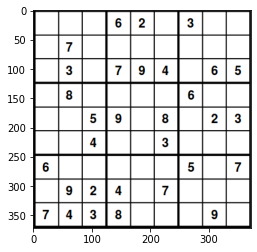

In [16]:
sudoku1 = cv2.imread("imágenes/sudoku1.png")
mostrarImagen(sudoku1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


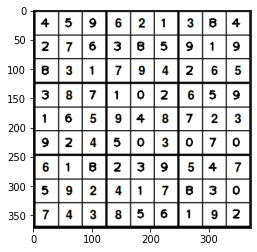

[[4 5 9 6 2 1 3 8 4]
 [2 7 6 3 8 5 9 1 9]
 [8 3 1 7 9 4 2 6 5]
 [3 8 7 1 0 2 6 5 9]
 [1 6 5 9 4 8 7 2 3]
 [9 2 4 5 0 3 0 7 0]
 [6 1 8 2 3 9 5 4 7]
 [5 9 2 4 1 7 8 3 0]
 [7 4 3 8 5 6 1 9 2]]
[[[4], [5], [9], [6], [2], [1], [3], [8], [4]], [[2], [7], [6], [3], [8], [5], [9], [1], [9]], [[8], [3], [1], [7], [9], [4], [2], [6], [5]], [[3], [8], [7], [1], [], [2], [6], [5], [9]], [[1], [6], [5], [9], [4], [8], [7], [2], [3]], [[9], [2], [4], [5], [6], [3], [], [7], [8, 1]], [[6], [1], [8], [2], [3], [9], [5], [4], [7]], [[5], [9], [2], [4], [1], [7], [8], [3], [6]], [[7], [4], [3], [8], [5], [6], [1], [9], [2]]]


In [73]:
cuadricula = leerSudoku(sudoku1)
cuadricula = np.array(cuadricula).reshape(9,9)
cuadricula = resuelveSudoku(cuadricula)
dibujaSudoku(sudoku1, cuadricula)
print(cuadricula)
print(get_candidatos(cuadricula))

In [18]:
candidatos = get_candidatos(cuadricula)
# Getting the shortest number of candidates > 1:
min_len = sorted(list(set(map(len, np.array(candidatos).reshape(1,81)[0]))))[1]
for i in range(9):
  for j in range(9):
    if len(candidatos[i][j]) == min_len:
      for guess in candidatos[i][j]:
        cuadricula[i][j] = guess
        solution = resuelveSudoku(cuadricula)
        if solution is not None:
          print(solution)
        # Discarding incorrect guess
        cuadricula[i][j] = 0

[[0 1 0 6 2 5 3 0 0]
 [0 7 0 0 0 0 0 0 0]
 [0 3 8 7 9 4 0 6 5]
 [0 8 0 0 0 0 6 0 0]
 [1 6 5 9 0 8 0 2 3]
 [0 0 4 0 0 3 0 0 0]
 [6 0 0 0 0 0 5 0 7]
 [0 9 2 4 0 7 0 0 0]
 [7 4 3 8 0 0 0 9 0]]
[[9 5 0 6 2 5 3 0 0]
 [4 7 6 3 0 1 0 0 0]
 [2 3 8 7 9 4 1 6 5]
 [3 8 0 0 0 2 6 0 0]
 [1 6 5 9 0 8 0 2 3]
 [0 2 4 0 0 3 0 0 0]
 [6 1 1 0 3 0 5 0 7]
 [0 9 2 4 0 7 0 0 0]
 [7 4 3 8 0 0 0 9 0]]
[[9 5 0 6 2 1 3 0 0]
 [4 7 6 3 0 1 0 8 0]
 [2 3 8 7 9 4 1 6 5]
 [3 8 0 0 0 2 6 0 0]
 [1 6 5 9 0 8 0 2 3]
 [0 2 4 0 0 3 0 0 0]
 [6 1 1 2 3 9 5 0 7]
 [0 9 2 4 0 7 8 0 0]
 [7 4 3 8 0 0 2 9 0]]
[[9 5 0 6 2 5 3 0 4]
 [4 7 6 3 0 1 9 8 0]
 [2 3 8 7 9 4 1 6 5]
 [3 8 0 0 0 2 6 0 0]
 [1 6 5 9 0 8 0 2 3]
 [0 2 4 0 0 3 0 0 0]
 [6 1 1 2 3 9 5 4 7]
 [5 9 2 4 0 7 8 0 0]
 [7 4 3 8 0 6 2 9 0]]
[[9 5 0 6 2 0 3 7 4]
 [4 7 6 3 5 1 9 8 2]
 [2 3 8 7 9 4 1 6 5]
 [3 8 0 0 0 2 6 0 0]
 [1 6 5 9 0 8 0 2 3]
 [0 2 4 0 0 3 7 0 0]
 [6 1 1 2 3 9 5 4 7]
 [5 9 2 4 1 7 8 0 0]
 [7 4 3 8 0 6 2 9 1]]
[[9 5 0 6 2 1 3 7 4]
 [4 7 6 3 5 5 9 8 2]
 [2 3 8 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


Al finalizar el notebook recuerda guardarlo usando la opción *"Save in Github..."*. 